In [377]:
import pylab as pl
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import seaborn as sns
plt.style.use('ggplot')

In [378]:
#Create dataframe from excel file for all states, all data categories
overall_data = pd.read_excel('~/github/gal/Analyzing-Medicare-Expansion/data/All States All Data Collected.xlsx')

#Subset dataframe to only include states that have expanded Medicare
mask = overall_data.Expanded == 'Expanded'
expanded = overall_data[mask]

#Subset dataframe to only include states that have not expanded Medicare
mask = overall_data.Expanded != 'Expanded'
not_expanded = overall_data[mask]


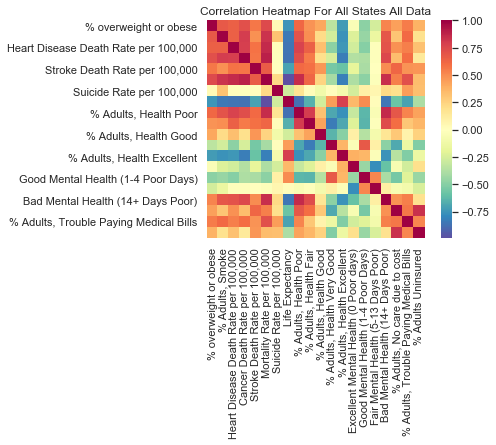

In [405]:
# Correlation Heatmap For All States all Data
corrs = overall_data.corr()
mask = np.zeros_like(corrs)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corrs, cmap='Spectral_r', square=True)

plt.title('Correlation Heatmap For All States All Data')
plt.savefig('Heatmap_all_states_all_data.png')

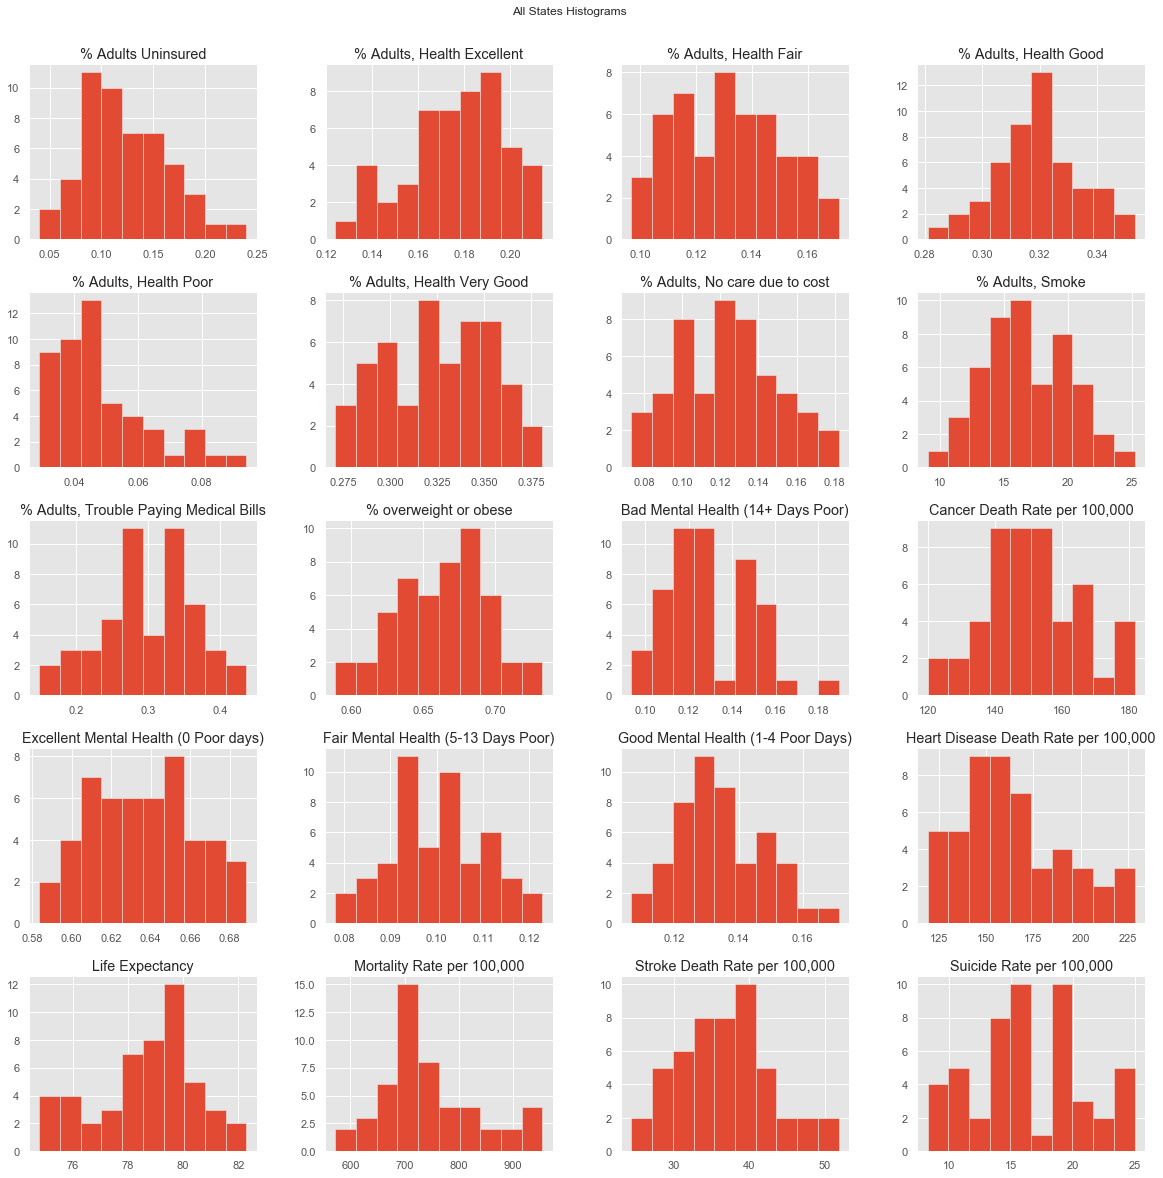

In [380]:
#Histograms for all states all data
overall_data.hist(figsize = (20,20))
pl.suptitle("All States Histograms" , y = .92)
plt.savefig("All_States_All_Data_Histograms.png")

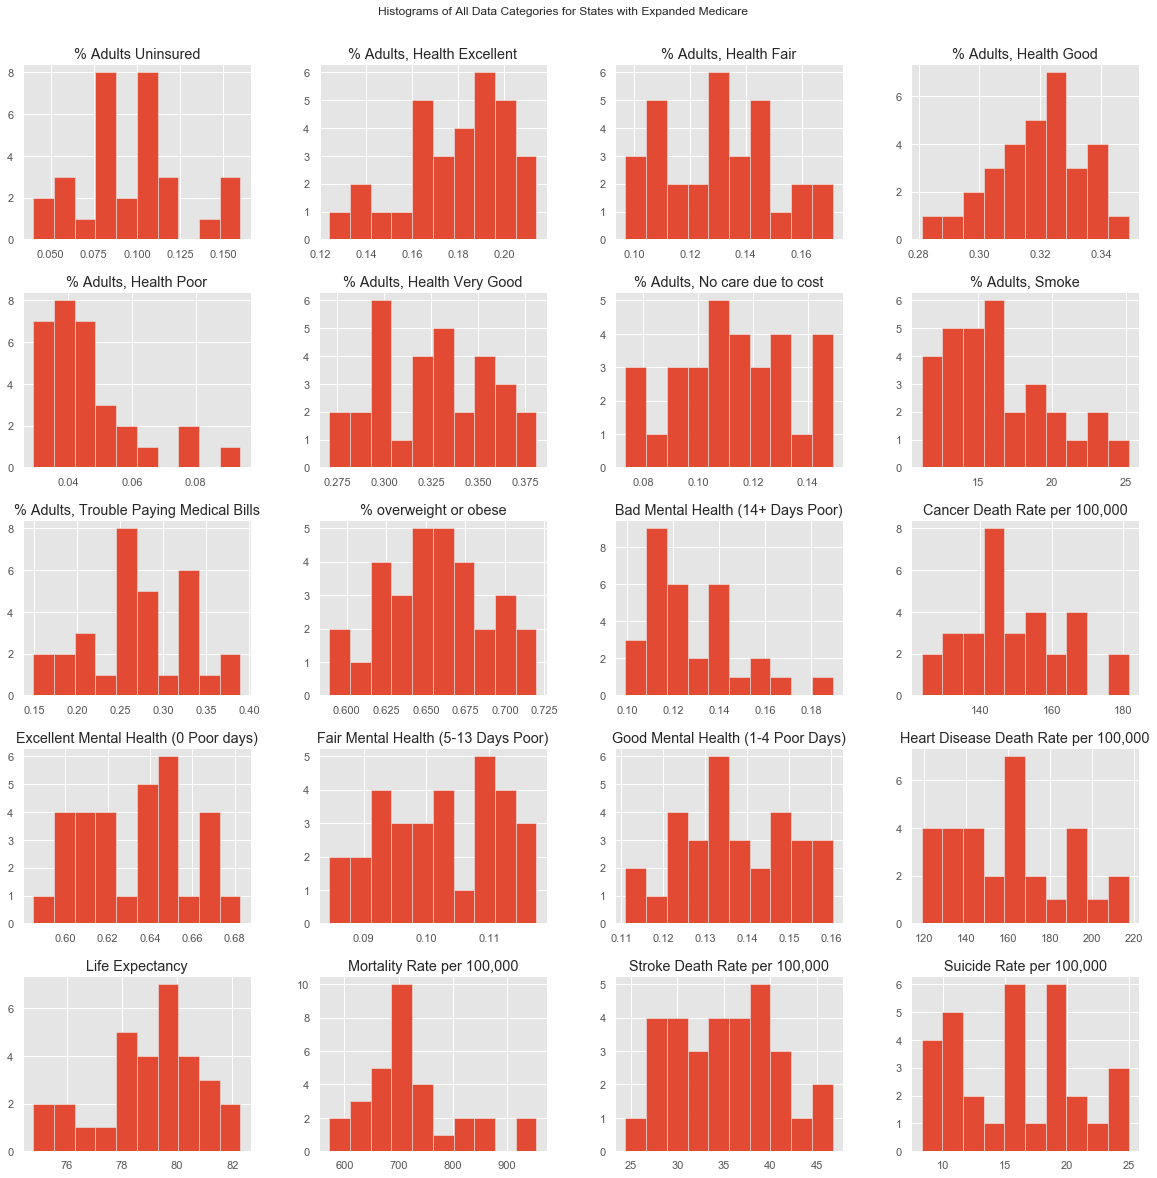

In [381]:
#Histograms of All Data Categories for States with Expanded Medicare
expanded.hist(figsize = (20,20))
pl.suptitle("Histograms of All Data Categories for States with Expanded Medicare" , y = .92)
plt.savefig("Expanded_Histograms.png")

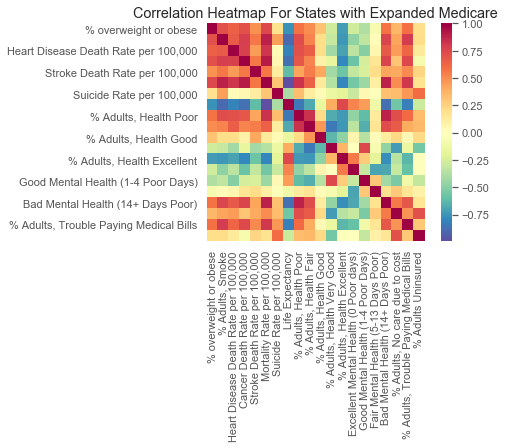

In [382]:
#Correlation Heatmap For States with Expanded Medicare
corrs = expanded.corr()
mask = np.zeros_like(corrs)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corrs, cmap='Spectral_r', square=True)

plt.title('Correlation Heatmap For States with Expanded Medicare')
plt.savefig('Heatmap_expanded.png')

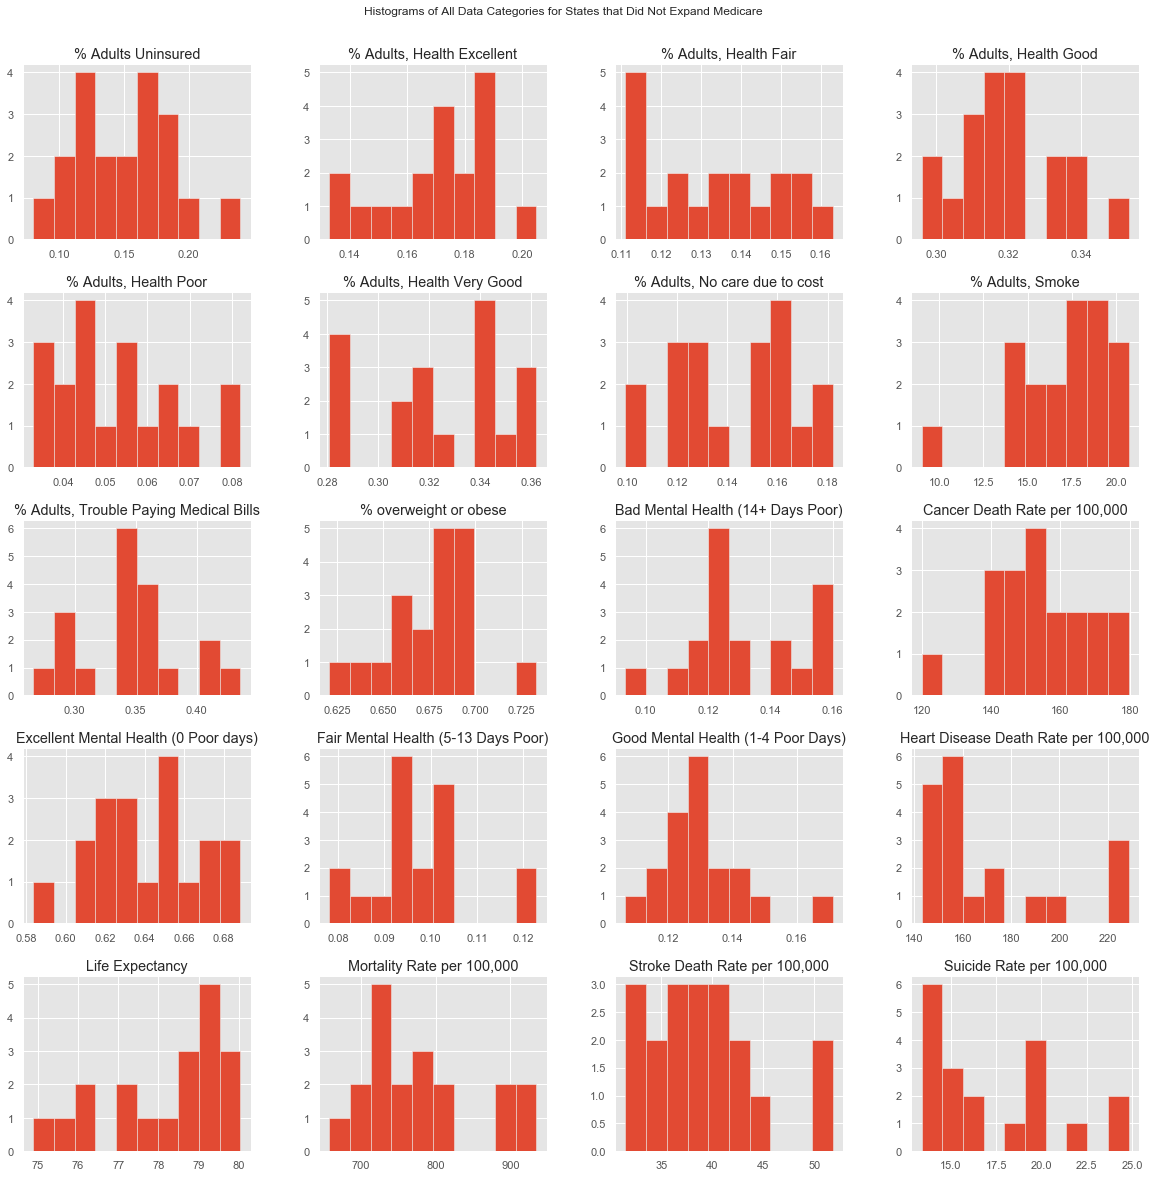

In [383]:
#Histograms of All Data Categories for States that Did Not Expand Medicare
not_expanded.hist(figsize = (20,20))
pl.suptitle("Histograms of All Data Categories for States that Did Not Expand Medicare" , y = .92)
plt.savefig("Not_Histograms.png")

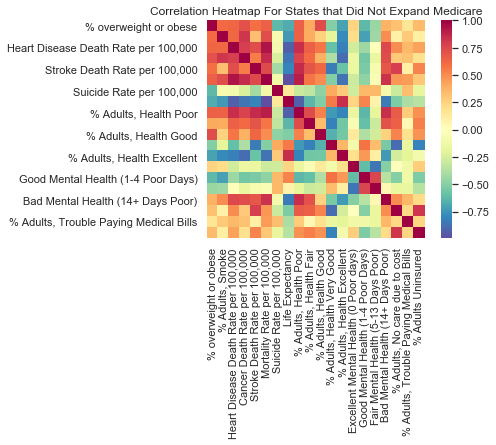

In [407]:
#Correlation Heatmap For States that Did Not Expand Medicare
corrs = not_expanded.corr()
mask = np.zeros_like(corrs)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corrs, cmap='Spectral_r', square=True)

plt.title('Correlation Heatmap For States that Did Not Expand Medicare')
plt.savefig('Heatmap_not.png')

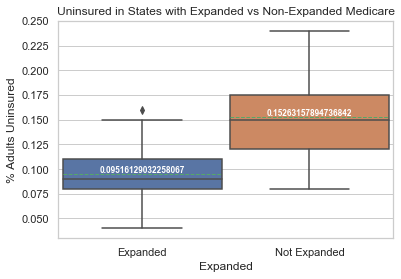

In [420]:
# % Adults Uninsured Boxplots with means labeled
col = '% Adults Uninsured'
sns.set(style="whitegrid")

box_plot= sns.boxplot(x="Expanded", y=col, data=overall_data,
                 order=["Expanded", "Not Expanded"],width = .95 ,meanline = True, showmeans =True)

means = overall_data.groupby(['Expanded'])[col].mean()
vertical_offset = overall_data[col].mean() * 0.01 # offset from median for display

for xtick in box_plot.get_xticks():
    box_plot.text(xtick,means[xtick] + vertical_offset,means[xtick], 
            horizontalalignment='center',size='x-small',color='w',weight='semibold')

plt.title("Uninsured in States with Expanded vs Non-Expanded Medicare")
plt.savefig("Box_Uninsured.png")

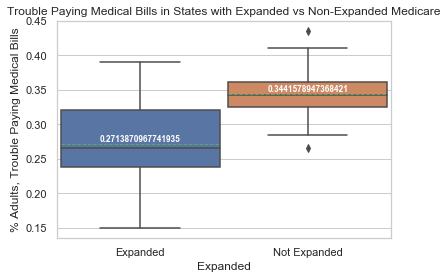

In [419]:
#% Adults, Trouble Paying Medical Bills Boxplots with means labeled
col = '% Adults, Trouble Paying Medical Bills'
sns.set(style="whitegrid")

box_plot= sns.boxplot(x="Expanded", y=col, data=overall_data,
                 order=["Expanded", "Not Expanded"],width = .95 ,meanline = True, showmeans =True)

means = overall_data.groupby(['Expanded'])[col].mean()
vertical_offset = overall_data[col].mean() * 0.01 # offset from median for display

for xtick in box_plot.get_xticks():
    box_plot.text(xtick,means[xtick] + vertical_offset,means[xtick], 
            horizontalalignment='center',size='x-small',color='w',weight='semibold')

plt.title("Trouble Paying Medical Bills in States with Expanded vs Non-Expanded Medicare")
plt.savefig("Box_Trouble.png")


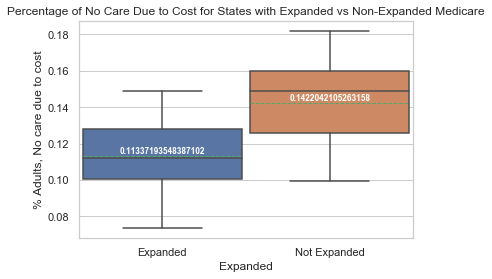

In [418]:
#% Adults, No care due to cost Boxplots with means labeled

col= '% Adults, No care due to cost'

sns.set(style="whitegrid")

box_plot= sns.boxplot(x="Expanded", y=col, data=overall_data,
                 order=["Expanded", "Not Expanded"],width = .95 ,meanline = True, showmeans =True)

means = overall_data.groupby(['Expanded'])[col].mean()
vertical_offset = overall_data[col].mean() * 0.01 # offset from median for display

for xtick in box_plot.get_xticks():
    box_plot.text(xtick,means[xtick] + vertical_offset,means[xtick], 
            horizontalalignment='center',size='x-small',color='w',weight='semibold')

plt.title("Percentage of No Care Due to Cost for States with Expanded vs Non-Expanded Medicare")
plt.savefig("Box_No_care.png")


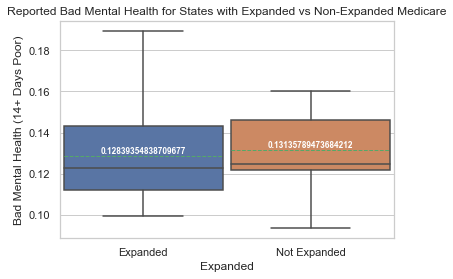

In [416]:
# Bad Mental Health (14+ Days Poor) Boxplots with means labeled
col= 'Bad Mental Health (14+ Days Poor)'

sns.set(style="whitegrid")

box_plot= sns.boxplot(x="Expanded", y=col, data=overall_data,
                 order=["Expanded", "Not Expanded"],width = .95 ,meanline = True, showmeans =True)

means = overall_data.groupby(['Expanded'])[col].mean()
vertical_offset = overall_data[col].mean() * 0.01 # offset from median for display

for xtick in box_plot.get_xticks():
    box_plot.text(xtick,means[xtick] + vertical_offset,means[xtick], 
            horizontalalignment='center',size='x-small',color='w',weight='semibold')

plt.title("Reported Bad Mental Health for States with Expanded vs Non-Expanded Medicare")
plt.savefig("Box_BADMH.png")


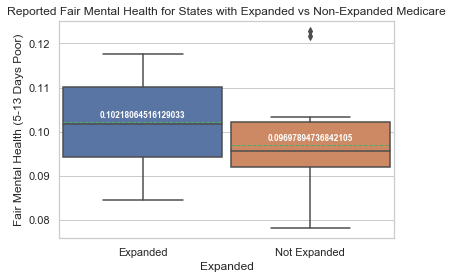

In [415]:
#Fair Mental Health (5-13 Days Poor) Boxplots with means labeled
col= 'Fair Mental Health (5-13 Days Poor)'

sns.set(style="whitegrid")

box_plot= sns.boxplot(x="Expanded", y=col, data=overall_data,
                 order=["Expanded", "Not Expanded"],width = .95 ,meanline = True, showmeans =True)

means = overall_data.groupby(['Expanded'])[col].mean()
vertical_offset = overall_data[col].mean() * 0.01 # offset from median for display

for xtick in box_plot.get_xticks():
    box_plot.text(xtick,means[xtick] + vertical_offset,means[xtick], 
            horizontalalignment='center',size='x-small',color='w',weight='semibold')

plt.title("Reported Fair Mental Health for States with Expanded vs Non-Expanded Medicare")
plt.savefig("Box_FairMH.png")

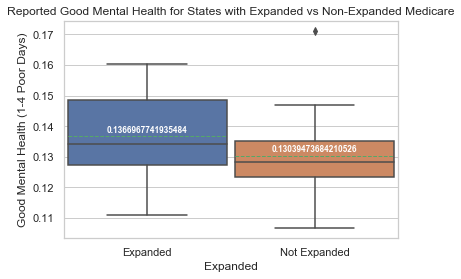

In [421]:
#Good Mental Health (1-4 Poor Days) Boxplots with means labeled
col= 'Good Mental Health (1-4 Poor Days)'

sns.set(style="whitegrid")

box_plot= sns.boxplot(x="Expanded", y=col, data=overall_data,
                 order=["Expanded", "Not Expanded"],width = .95 ,meanline = True, showmeans =True)

means = overall_data.groupby(['Expanded'])[col].mean()
vertical_offset = overall_data[col].mean() * 0.01 # offset from median for display

for xtick in box_plot.get_xticks():
    box_plot.text(xtick,means[xtick] + vertical_offset,means[xtick], 
            horizontalalignment='center',size='x-small',color='w',weight='semibold')

plt.title("Reported Good Mental Health for States with Expanded vs Non-Expanded Medicare")
plt.savefig("Box_GoodMH.png")

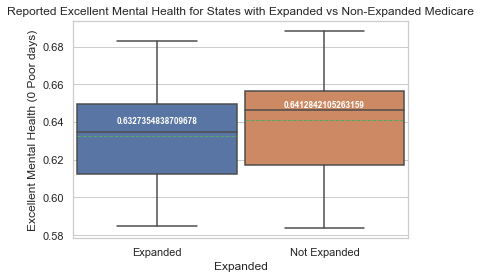

In [422]:
# Excellent Mental Health (0 Poor days) Boxplots with means labeled
col= 'Excellent Mental Health (0 Poor days)'

sns.set(style="whitegrid")

box_plot= sns.boxplot(x="Expanded", y=col, data=overall_data,
                 order=["Expanded", "Not Expanded"],width = .95 ,meanline = True, showmeans =True)

means = overall_data.groupby(['Expanded'])[col].mean()
vertical_offset = overall_data[col].mean() * 0.01 # offset from median for display

for xtick in box_plot.get_xticks():
    box_plot.text(xtick,means[xtick] + vertical_offset,means[xtick], 
            horizontalalignment='center',size='x-small',color='w',weight='semibold')

plt.title("Reported Excellent Mental Health for States with Expanded vs Non-Expanded Medicare")
plt.savefig("Box_EXCMH.png")

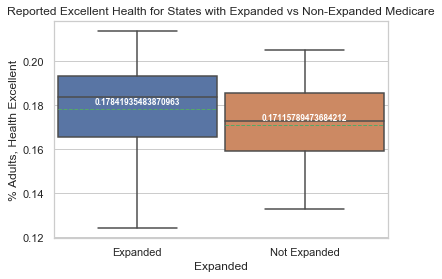

In [423]:
# % Adults, Health Excellent Boxplots with means labeled
col= '% Adults, Health Excellent'

sns.set(style="whitegrid")

box_plot= sns.boxplot(x="Expanded", y=col, data=overall_data,
                 order=["Expanded", "Not Expanded"],width = .95 ,meanline = True, showmeans =True)

means = overall_data.groupby(['Expanded'])[col].mean()
vertical_offset = overall_data[col].mean() * 0.01 # offset from median for display

for xtick in box_plot.get_xticks():
    box_plot.text(xtick,means[xtick] + vertical_offset,means[xtick], 
            horizontalalignment='center',size='x-small',color='w',weight='semibold')

plt.title("Reported Excellent Health for States with Expanded vs Non-Expanded Medicare")
plt.savefig("Box_ExcH.png")

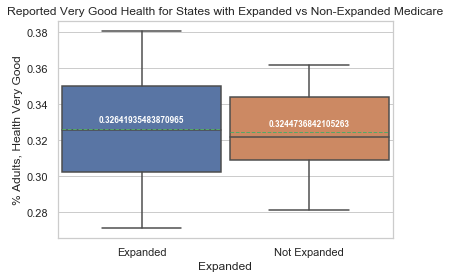

In [424]:
# % Adults, Health Very Good Boxplots with means labeled
col= '% Adults, Health Very Good'

sns.set(style="whitegrid")

box_plot= sns.boxplot(x="Expanded", y=col, data=overall_data,
                 order=["Expanded", "Not Expanded"],width = .95 ,meanline = True, showmeans =True)

means = overall_data.groupby(['Expanded'])[col].mean()
vertical_offset = overall_data[col].mean() * 0.01 # offset from median for display

for xtick in box_plot.get_xticks():
    box_plot.text(xtick,means[xtick] + vertical_offset,means[xtick], 
            horizontalalignment='center',size='x-small',color='w',weight='semibold')

plt.title("Reported Very Good Health for States with Expanded vs Non-Expanded Medicare")
plt.savefig("Box_VGHealth.png")

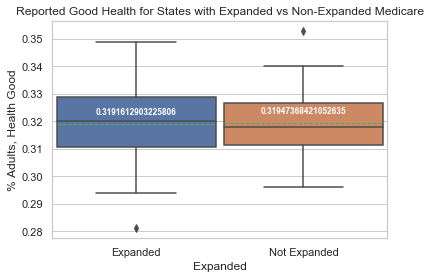

In [425]:
# % Adults, Health Good Boxplots with means labeled
col= '% Adults, Health Good'

sns.set(style="whitegrid")

box_plot= sns.boxplot(x="Expanded", y=col, data=overall_data,
                 order=["Expanded", "Not Expanded"],width = .95 ,meanline = True, showmeans =True)

means = overall_data.groupby(['Expanded'])[col].mean()
vertical_offset = overall_data[col].mean() * 0.01 # offset from median for display

for xtick in box_plot.get_xticks():
    box_plot.text(xtick,means[xtick] + vertical_offset,means[xtick], 
            horizontalalignment='center',size='x-small',color='w',weight='semibold')

plt.title("Reported Good Health for States with Expanded vs Non-Expanded Medicare")
plt.savefig("Box_Good_Health.png")

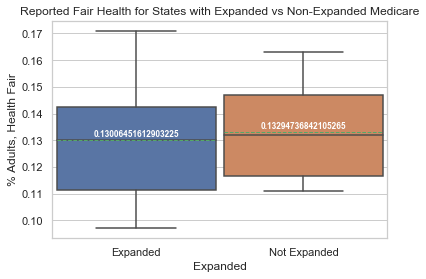

In [426]:
# % Adults, Health Fair Boxplots with means labeled
col= '% Adults, Health Fair'

sns.set(style="whitegrid")

box_plot= sns.boxplot(x="Expanded", y=col, data=overall_data,
                 order=["Expanded", "Not Expanded"],width = .95 ,meanline = True, showmeans =True)

means = overall_data.groupby(['Expanded'])[col].mean()
vertical_offset = overall_data[col].mean() * 0.01 # offset from median for display

for xtick in box_plot.get_xticks():
    box_plot.text(xtick,means[xtick] + vertical_offset,means[xtick], 
            horizontalalignment='center',size='x-small',color='w',weight='semibold')

plt.title("Reported Fair Health for States with Expanded vs Non-Expanded Medicare")
plt.savefig("Box_Fair_Health.png")

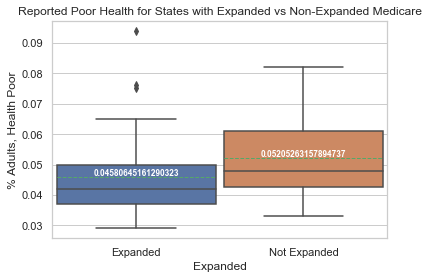

In [427]:
# % Adults, Health Poor Histogram Boxplots with means labeled
col= '% Adults, Health Poor'

sns.set(style="whitegrid")

box_plot= sns.boxplot(x="Expanded", y=col, data=overall_data,
                 order=["Expanded", "Not Expanded"],width = .95 ,meanline = True, showmeans =True)

means = overall_data.groupby(['Expanded'])[col].mean()
vertical_offset = overall_data[col].mean() * 0.01 # offset from median for display

for xtick in box_plot.get_xticks():
    box_plot.text(xtick,means[xtick] + vertical_offset,means[xtick], 
            horizontalalignment='center',size='x-small',color='w',weight='semibold')

plt.title("Reported Poor Health for States with Expanded vs Non-Expanded Medicare")
plt.savefig("Box_Poor_Health.png")

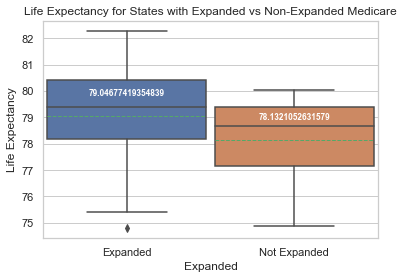

In [397]:
# Life Expectancy Boxplots with means labeled
col= 'Life Expectancy'

sns.set(style="whitegrid")

box_plot= sns.boxplot(x="Expanded", y=col, data=overall_data,
                 order=["Expanded", "Not Expanded"],width = .95 ,meanline = True, showmeans =True)

means = overall_data.groupby(['Expanded'])[col].mean()
vertical_offset = overall_data[col].mean() * 0.01 # offset from median for display

for xtick in box_plot.get_xticks():
    box_plot.text(xtick,means[xtick] + vertical_offset,means[xtick], 
            horizontalalignment='center',size='x-small',color='w',weight='semibold')

plt.title("Life Expectancy for States with Expanded vs Non-Expanded Medicare")
plt.savefig("Box_LE.png")

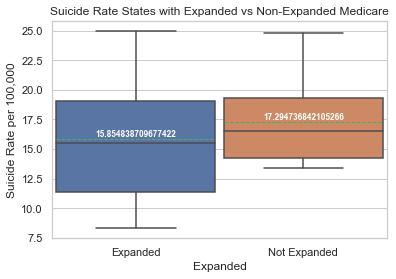

In [428]:
# Boxplots with means labeled for 'Suicide Rate per 100,000'
col= 'Suicide Rate per 100,000'

sns.set(style="whitegrid")

box_plot= sns.boxplot(x="Expanded", y=col, data=overall_data,
                 order=["Expanded", "Not Expanded"],width = .95 ,meanline = True, showmeans =True)

means = overall_data.groupby(['Expanded'])[col].mean()
vertical_offset = overall_data[col].mean() * 0.01 # offset from median for display

for xtick in box_plot.get_xticks():
    box_plot.text(xtick,means[xtick] + vertical_offset,means[xtick], 
            horizontalalignment='center',size='x-small',color='w',weight='semibold')

plt.title("Suicide Rate States with Expanded vs Non-Expanded Medicare")
plt.savefig("Box_suicide.png")

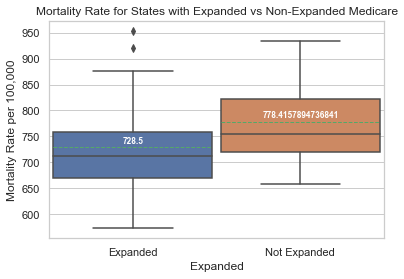

In [429]:
# Boxplots with means labeled for Mortality Rate per 100,000'
col= 'Mortality Rate per 100,000'

sns.set(style="whitegrid")

box_plot= sns.boxplot(x="Expanded", y=col, data=overall_data,
                 order=["Expanded", "Not Expanded"],width = .95 ,meanline = True, showmeans =True)

means = overall_data.groupby(['Expanded'])[col].mean()
vertical_offset = overall_data[col].mean() * 0.01 # offset from median for display

for xtick in box_plot.get_xticks():
    box_plot.text(xtick,means[xtick] + vertical_offset,means[xtick], 
            horizontalalignment='center',size='x-small',color='w',weight='semibold')

plt.title("Mortality Rate for States with Expanded vs Non-Expanded Medicare")
plt.savefig("Box_Mortality.png")

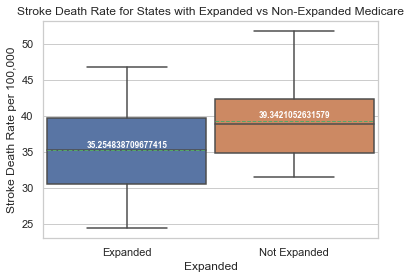

In [430]:
#Boxplots with means labeled Stroke Death Rate per 100,000
col= 'Stroke Death Rate per 100,000'

sns.set(style="whitegrid")

box_plot= sns.boxplot(x="Expanded", y=col, data=overall_data,
                 order=["Expanded", "Not Expanded"],width = .95 ,meanline = True, showmeans =True)

means = overall_data.groupby(['Expanded'])[col].mean()
vertical_offset = overall_data[col].mean() * 0.01 # offset from median for display

for xtick in box_plot.get_xticks():
    box_plot.text(xtick,means[xtick] + vertical_offset,means[xtick], 
            horizontalalignment='center',size='x-small',color='w',weight='semibold')

plt.title("Stroke Death Rate for States with Expanded vs Non-Expanded Medicare")
plt.savefig("Box_Stroke.png")

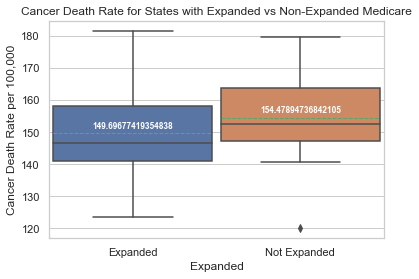

In [431]:
#Boxplots with means labeled Cancer Death Rate per 100,000
col= 'Cancer Death Rate per 100,000'

sns.set(style="whitegrid")

box_plot= sns.boxplot(x="Expanded", y=col, data=overall_data,
                 order=["Expanded", "Not Expanded"],width = .95 ,meanline = True, showmeans =True)

means = overall_data.groupby(['Expanded'])[col].mean()
vertical_offset = overall_data[col].mean() * 0.01 # offset from median for display

for xtick in box_plot.get_xticks():
    box_plot.text(xtick,means[xtick] + vertical_offset,means[xtick], 
            horizontalalignment='center',size='x-small',color='w',weight='semibold')

plt.title("Cancer Death Rate for States with Expanded vs Non-Expanded Medicare")
plt.savefig("Box_Cancer.png")

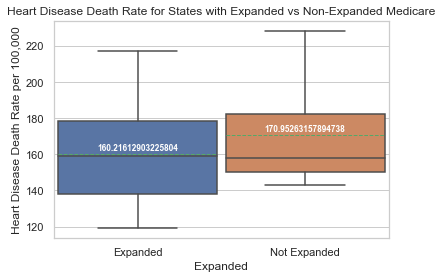

In [432]:
#Boxplots with means labeled Heart Disease Death Rate per 100,000
col= 'Heart Disease Death Rate per 100,000'

sns.set(style="whitegrid")

box_plot= sns.boxplot(x="Expanded", y=col, data=overall_data,
                 order=["Expanded", "Not Expanded"],width = .95 ,meanline = True, showmeans =True)

means = overall_data.groupby(['Expanded'])[col].mean()
vertical_offset = overall_data[col].mean() * 0.01 # offset from median for display

for xtick in box_plot.get_xticks():
    box_plot.text(xtick,means[xtick] + vertical_offset,means[xtick], 
            horizontalalignment='center',size='x-small',color='w',weight='semibold')

plt.title("Heart Disease Death Rate for States with Expanded vs Non-Expanded Medicare")
plt.savefig("Box_HD.png")

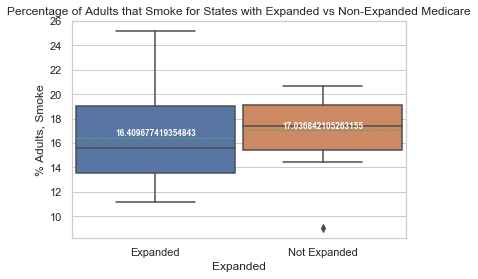

In [403]:
#Boxplots with means labeled % Adults, Smoke
col= '% Adults, Smoke'

sns.set(style="whitegrid")

box_plot= sns.boxplot(x="Expanded", y=col, data=overall_data,
                 order=["Expanded", "Not Expanded"],width = .95 ,meanline = True, showmeans =True)

means = overall_data.groupby(['Expanded'])[col].mean()
vertical_offset = overall_data[col].mean() * 0.01 # offset from median for display

for xtick in box_plot.get_xticks():
    box_plot.text(xtick,means[xtick] + vertical_offset,means[xtick], 
            horizontalalignment='center',size='x-small',color='w',weight='semibold')

plt.title("Percentage of Adults that Smoke for States with Expanded vs Non-Expanded Medicare")
plt.savefig("Box_Smoke.png")

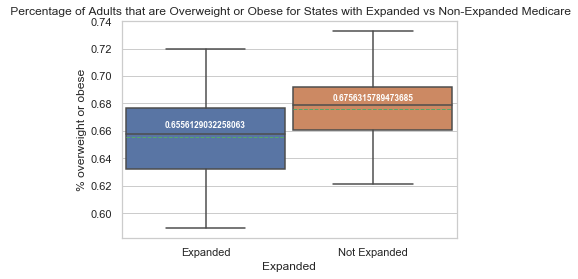

In [404]:
#Boxplots with means labeled % overweight or obese
col=  '% overweight or obese'

sns.set(style="whitegrid")

box_plot= sns.boxplot(x="Expanded", y=col, data=overall_data,
                 order=["Expanded", "Not Expanded"],width = .95 ,meanline = True, showmeans =True)

means = overall_data.groupby(['Expanded'])[col].mean()
vertical_offset = overall_data[col].mean() * 0.01 # offset from median for display

for xtick in box_plot.get_xticks():
    box_plot.text(xtick,means[xtick] + vertical_offset,means[xtick], 
            horizontalalignment='center',size='x-small',color='w',weight='semibold')

plt.title(" Percentage of Adults that are Overweight or Obese for States with Expanded vs Non-Expanded Medicare")
plt.savefig("Box_Overweight.png")